In [1]:
# Input the DB to Memory
import pandas as pd
import numpy as np
print("Loading DB...")
data_file = pd.ExcelFile("globalterrorismdb_0616dist.xlsx")
#data_file = pd.ExcelFile("test_data.xlsx")
print("DB Read...")
print(data_file.sheet_names)
dfs = data_file.parse(data_file.sheet_names[0])
print("DB Parsed...")

Loading DB...
DB Read...
['Data']
DB Parsed...


In [2]:
# General Information regarding the DB
columns = dfs.columns
total_entries = len(dfs)
print("Total attributes:" + str(len(columns)))
print("Total entries:"+ str(total_entries))
#for years in dfs[columns[1]]:
#    print(years)
#print(dfs[columns[1]])
#unique_years, year_counts = np.unique(dfs[columns[1]], return_counts=True)
#print(unique_years)
#print(year_counts)

Total attributes:137
Total entries:156772


Missing year: 1993
Length matches.
Sum of year frequencies = Number of total entries


<IPython.core.display.Javascript object>


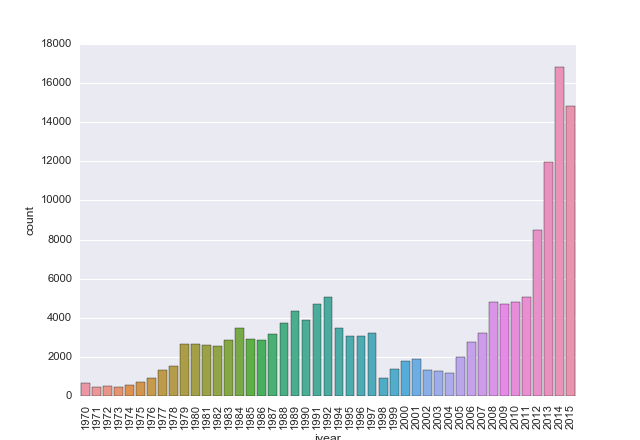

In [3]:
# Start with Column 1. Describes the year of the event. Ignoring column 0 as it's just a unique ID. 
# Maybe useful later to create dictionaries.
# Histogram shows the number of incidents per year
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
unique_years, year_counts = np.unique(dfs[columns[1]], return_counts=True)
count = 0
# Check if any year is missing from the data
for i in range(unique_years[0],unique_years[len(unique_years)-1]):
    if i != unique_years[i-1970-count]:
        print("Missing year: " + str(i))
        count = count+1
# Check if any row is missing a year
if total_entries == len(dfs[columns[1]]):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch.")
total = np.sum(year_counts)
if total_entries == total:
    print("Sum of year frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")
ax = sns.countplot(dfs[columns[1]])
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
[   23 12878 11824 13138 13090 14423 13107 14117 13644 12200 13591 12968
 11769]
For some incidents we do not know the exact date or month :(). We can choose to ignore this data.
Length matches.
Sum of month  frequencies = Number of total entries


<IPython.core.display.Javascript object>


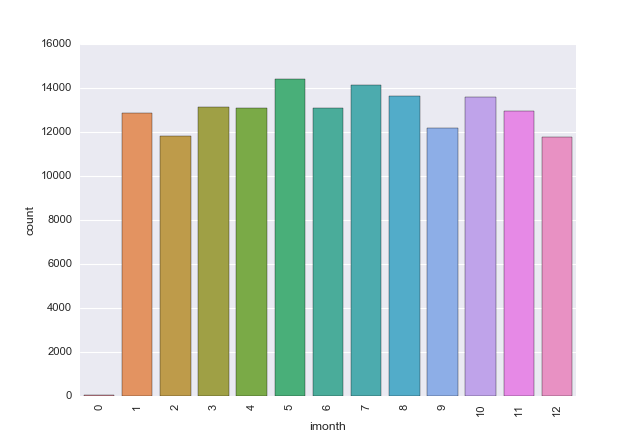

In [4]:
# Start with Column 2. Month of attack.
# Histogram shows the number of incidents per month, over all years
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
unique_months, month_counts = np.unique(dfs[columns[2]], return_counts=True)
print(unique_months)
print(month_counts)

print("For some incidents we do not know the exact date or month :(). We can choose to ignore this data.")
# Check if any month is missing in the data
for i in range(0,12):
    if i not in unique_months:
        print("Missing month: " + str(i))
# Check if any row is missing a year
if total_entries == len(dfs[columns[2]]):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch.")
total = np.sum(month_counts)
if total_entries == total:
    print("Sum of month  frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")
ax = sns.countplot(dfs[columns[2]])
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
[ 894 5540 5193 5202 5334 5005 4956 5150 5043 5247 5294 5155 5171 5246 5251
 5571 5319 5107 5036 5133 5132 4894 5037 4981 4944 5021 5021 5109 5164 4700
 4308 2614]
For some incidents we do not know the exact date or month :(). We can choose to ignore this data.
Length matches.
Sum of day frequencies = Number of total entries


<IPython.core.display.Javascript object>


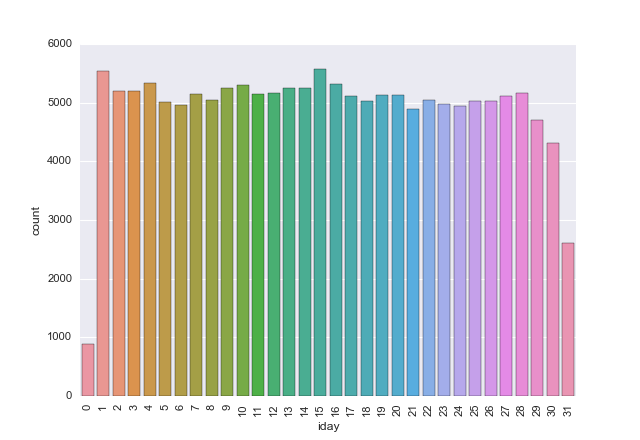

In [5]:
# Start with Column 3. Date of attack.
# Histogram shows the number of incidents per day, over all years
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[3]]
unique_days, day_counts = np.unique(curr_column, return_counts=True)
print(unique_days)
print(day_counts)

print("For some incidents we do not know the exact date or month :(). We can choose to ignore this data.")
# Check if any day is missing in the data
for i in range(0,31):
    if i not in unique_days:
        print("Missing day: " + str(i))
# Check if any row is missing a year
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch.")
total = np.sum(day_counts)
if total_entries == total:
    print("Sum of day frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")
ax = sns.countplot(curr_column)
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

In [4]:
# Start with Column 4. Approx date. Doesn't seem too important. 
# This needs to be cleaned. Some dates are 0, some months are 0, but most have proper dates in the date field.
curr_column = dfs[columns[4]]
sec_column = dfs[columns[2]]
third_column = dfs[columns[3]]
exact_date_count = 0
require_approx_date_count = 0
for index, approx_date in enumerate(curr_column):
    if str(approx_date) == "nan":
        exact_date_count += 1
    else:
        #print("Approx date: " + str(approx_date) + " Actual Date: " + str(sec_column[index]) + "/" 
            #+ str(third_column[index]) + "/")
        if sec_column[index] == 0 or third_column[index] == 0:
            require_approx_date_count += 1
print("Approx date row count = " + str(total_entries - exact_date_count) + " Cases where we don't know date OR month = "
     + str(require_approx_date_count))

Approx date row count = 4756 Cases where we don't know date OR month = 265


Number of extended events = 6482 Number of missing resolutions = 3004


<IPython.core.display.Javascript object>


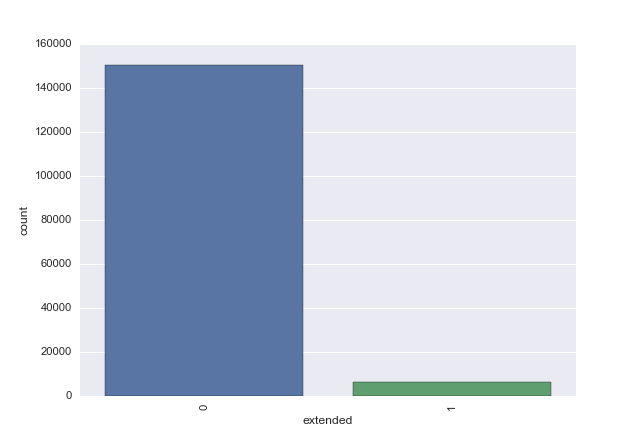

In [6]:
# Start with Column 5 and 6. IsExtendedEvent. ResolutionDate  
# These can be used together to find the duration of events with lasted more than 1 day
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[5]]
sec_column = dfs[columns[6]]
num_extended_events = 0
num_missing_resolutions = 0
for index, is_extended in enumerate(curr_column):
        if is_extended == 1:
            #print(sec_column[index])
            if str(sec_column[index]) == "nan":
                #print("Error. Extended event does not have a resolution date. Index = " + str(index))
                num_missing_resolutions += 1
        num_extended_events += is_extended
print("Number of extended events = " + str(num_extended_events) + " Number of missing resolutions = " + str(num_missing_resolutions))

ax = sns.countplot(curr_column)
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

In [8]:
# Start with Column 7. Country Code These codes are also used for the target/victim nationality fields.
# We should create a dict from the codebook. Some countries only have victims, and can be added manually.
curr_column = dfs[columns[7]]

unique_countries, country_counts = np.unique(curr_column, return_counts=True)
number_of_countries_code = len(unique_countries)

#Check if any row is missing the country name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch.")
total = np.sum(country_counts)
if total_entries == total:
    print("Sum of country frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

Length matches.
Sum of country frequencies = Number of total entries


Number of Unique countries: 206
Number of country codes matches number of country txt
Length matches.
Sum of year frequencies = Number of total entries


<IPython.core.display.Javascript object>


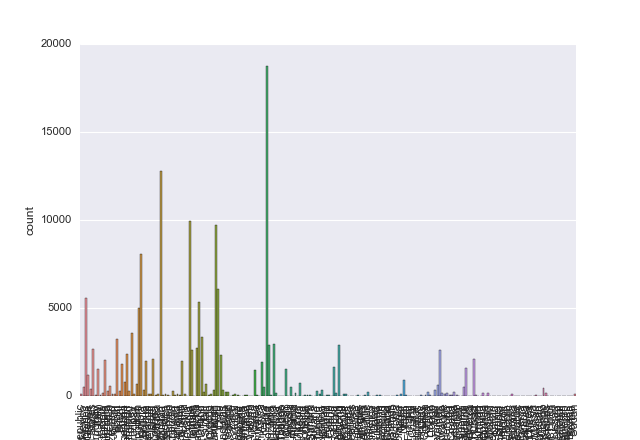

In [9]:
# Start with Column 8. Country Text.
# Histogram shows the number of incidents per country, over all years
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[8]]

unique_countries, country_counts = np.unique(curr_column, return_counts=True)
#print(unique_countries)
#print(country_counts)
number_of_countries_txt = len(unique_countries)
print("Number of Unique countries: " + str(number_of_countries_txt))
if number_of_countries_txt == number_of_countries_code:
    print("Number of country codes matches number of country txt")
#Check if any row is missing the country name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch.")
total = np.sum(country_counts)
if total_entries == total:
    print("Sum of year frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")
ax = sns.countplot(curr_column)
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

In [10]:
# Start with Column 9. Region Code. May be redundant due to Region_txt.
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[9]]

unique_regions, region_counts = np.unique(curr_column, return_counts=True)
print(unique_regions)
print(region_counts)
number_of_regions_code = len(unique_regions)
#print("Number of Unique countries: " + str(number_of_countries_code))

#Check if any row is missing the country name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch.")
total = np.sum(region_counts)
if total_entries == total:
    print("Sum of region frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")
#ax = sns.countplot(curr_column)
#_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 3268 10337 18628   786 10360 37841   538 16020  4892 40422 13434   246]
Length matches.
Sum of region frequencies = Number of total entries


['Australasia & Oceania' 'Central America & Caribbean' 'Central Asia'
 'East Asia' 'Eastern Europe' 'Middle East & North Africa' 'North America'
 'South America' 'South Asia' 'Southeast Asia' 'Sub-Saharan Africa'
 'Western Europe']
[  246 10337   538   786  4892 40422  3268 18628 37841 10360 13434 16020]
Number of region codes matches number of region txt
Length matches.
Sum of region frequencies = Number of total entries


<IPython.core.display.Javascript object>


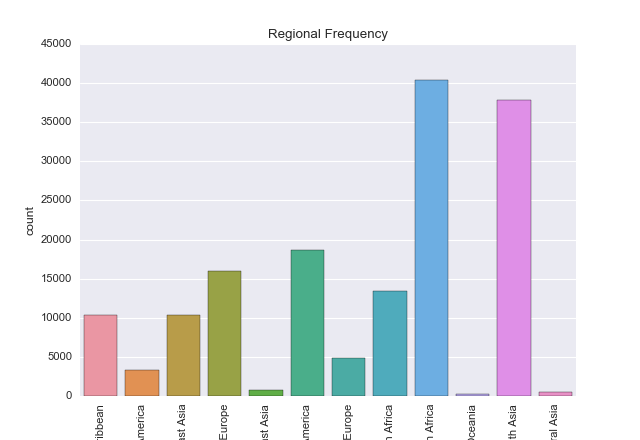

In [11]:
# Start with Column 10. Region Text. 
# Histogram shows number of events in each region over all years.
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[10]]

unique_regions, region_counts = np.unique(curr_column, return_counts=True)
print(unique_regions)
print(region_counts)
number_of_regions_txt = len(unique_regions)
#print("Number of Unique countries: " + str(number_of_countries_code))
if number_of_regions_txt == number_of_regions_code:
    print("Number of region codes matches number of region txt")
    
#Check if any row is missing the region name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch.")
total = np.sum(region_counts)
if total_entries == total:
    print("Sum of region frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")
ax = sns.countplot(curr_column)
mp.pyplot.title("Regional Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

In [10]:
# Start with Column 11. Province/State Name. 
# Histogram probably not the best way to visualize this data. Maybe we can do this for every country.
#%matplotlib notebook
#import seaborn as sns
#import matplotlib as mp
curr_column = dfs[columns[11]]
prov_dict = {}
for index, prov in enumerate(curr_column):
    if str(prov) in prov_dict:
        prov_dict[str(prov)] += 1
    else:
        prov_dict[str(prov)] = 1

#unique_provs, prov_counts = np.unique(curr_column, return_counts=True)
#print(unique_provs)
#print(prov_counts)
print("Number of unique provs: " + str(len(prov_dict)))
#Check if any row is missing the prov name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch. Total = " + str(total_entries) + " in this column = " + str(len(curr_column)))
#total = np.sum(prov_counts)
#if total_entries == total:
#    print("Sum of prov frequencies = Number of total entries")
#else:
#    print("Achtung!! Cumulative frequency mismatch.")
print("Empty provs instances = " + str(prov_dict["nan"]) + " Unknown provs instances = " + str(prov_dict["Unknown"])) 
#ax = sns.countplot(curr_column)
#_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

Number of unique provs: 2510
Length matches.
Empty provs instances = 14520 Unknown provs instances = 3128


In [11]:
# Start with Column 12. City. 
# Histogram probably not the best way to visualize this data. Maybe we can do this for every country.
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[12]]
city_dict = {}
for index, city in enumerate(curr_column):
    if str(city) in city_dict:
        city_dict[str(city)] += 1
    else:
        city_dict[str(city)] = 1

print("Number of unique cities: " + str(len(city_dict)))
#unique_cities, city_counts = np.unique(curr_column, return_counts=True)
#print(unique_provs)
#print(prov_counts)

#Check if any row is missing the prov name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch.")
#total = np.sum(city_counts)
#if total_entries == total:
#    print("Sum of city frequencies = Number of total entries")
#else:
#    print("Achtung!! Cumulative frequency mismatch.")
print("Empty cities = " + str(city_dict["nan"]) + " Unknown provs instances = " + str(city_dict["Unknown"])) 
#ax = sns.countplot(curr_column)
#_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

Number of unique cities: 31325
Length matches.
Empty cities = 446 Unknown provs instances = 8728


In [33]:
# Start with Column 13,14. Lat & Long. 
# Histogram probably not the best way to visualize this data. Maybe we can do this for every country.
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[13]]
sec_column = dfs[columns[14]]
empty_count_lat_long = 0
unknown_count_lat_long = 0
for index, lat in enumerate(curr_column):
    if str(lat) == "nan" and str(sec_column[index]) == "nan":
        empty_count_lat_long += 1
    elif isinstance(lat, float) and isinstance(sec_column[index],float):
        continue
    else:
        print("One of lat or long is missing at index : " + str(index))
#unique_cities, city_counts = np.unique(curr_column, return_counts=True)
#print(unique_provs)
#print(prov_counts)

#Check if any row is missing the prov name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch.")
#total = np.sum(city_counts)
#if total_entries == total:
#    print("Sum of city frequencies = Number of total entries")
#else:
#    print("Achtung!! Cumulative frequency mismatch.")
print("Empty lats + longs = " + str(empty_count_lat_long)) 
#ax = sns.countplot(curr_column)
#_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

Length matches.
Empty lats + longs = 4519


In [39]:
# Start with Column 12,13,14. City, Lat & Long. Check if City missing and lat long present or vice versa. 
# Histogram probably not the best way to visualize this data. Maybe we can do this for every country.

curr_column = dfs[columns[12]]
sec_column = dfs[columns[13]]
city_missing_count = 0
lat_long_missing_count = 0
no_location_info_count = 0
for index, city in enumerate(curr_column):
    if str(city) == "nan" or str(city) == "Unknown":
        if str(sec_column[index]) == "nan":
            no_location_info_count += 1
        elif isinstance(sec_column[index],float):
            city_missing_count += 1
    elif str(sec_column[index]) == "nan":
        lat_long_missing_count += 1
print("Missing Cities with Lats/Longs = " + str(city_missing_count) + " Missing Lat/Longs with Cities = " 
      + str(lat_long_missing_count) + " Events with no city or Lat/Long = " + str(no_location_info_count))

Missing Cities with Lats/Longs = 7136 Missing Lat/Longs with Cities = 2481 Events with no city or Lat/Long = 2038


[1 2 3 4 5]
[126425   6235  12145   7433   4534]
Length matches.
Sum of specificity frequencies = Number of total entries


<IPython.core.display.Javascript object>


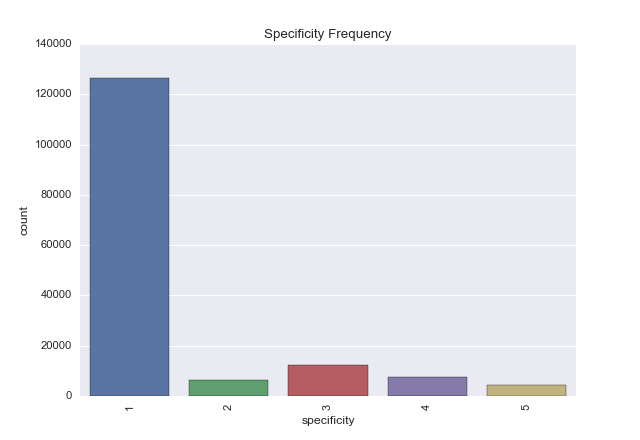

In [42]:
# Start with Column 15. Location Specificity. 1 is geolocation for city/town/village, 5 is Unknown 
# Histogram shows number of events of each specificity.
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[15]]

unique_specificity, specificity_counts = np.unique(curr_column, return_counts=True)
print(unique_specificity)
print(specificity_counts)
    
#Check if any row is missing the region name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch. total_entries = " + str(total_entries) + " length spec count = " + str(len(specificity_counts)))
total = np.sum(specificity_counts)
if total_entries == total:
    print("Sum of specificity frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")
ax = sns.countplot(curr_column)
mp.pyplot.title("Specificity Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

[-9  0  1]
[    36 145842  10894]
Length matches.
Sum of Vicinity frequencies = Number of total entries


<IPython.core.display.Javascript object>


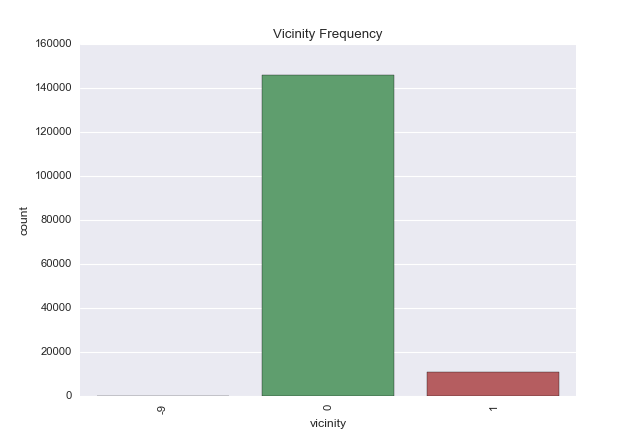

In [13]:
# Start with Column 16. Location Vicinity. 0 - Happened in that city. 1 - Happened in the vicinity of the city.
# Histogram shows number of events happening in the city and in the vicinity.
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[16]]

unique_vicinity, vicinity_counts = np.unique(curr_column, return_counts=True)
print(unique_vicinity)
print(vicinity_counts)
    
#Check if any row is missing the region name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch. total_entries = " + str(total_entries) + " length spec count = " + str(len(vicinity_counts)))
total = np.sum(vicinity_counts)
if total_entries == total:
    print("Sum of Vicinity frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")
ax = sns.countplot(curr_column)
mp.pyplot.title("Vicinity Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

In [37]:
# Start with Column 19-21. Criterion 1-3. Criterion 1: POLITICAL, ECONOMIC, RELIGIOUS, OR SOCIAL GOAL (CRIT1)
# Criterion 2: INTENTION TO COERCE, INTIMIDATE OR PUBLICIZE TO LARGER AUDIENCE(S) (CRIT2)
# Criterion 3: OUTSIDE INTERNATIONAL HUMANITARIAN LAW (CRIT3)
# Maybe a venn diagram would be a good idea to visualize this data

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[19]]
sec_column = dfs[columns[20]]
third_column = dfs[columns[21]]
crit_dict = {1:0,2:0,3:0,12:0,13:0,23:0,123:0,0:0}

# For checks that each column has total_entries number of entries.
for i in range(0,total_entries):
    crit_dict[1] += curr_column[i]
    crit_dict[2] += sec_column[i]
    crit_dict[3] += third_column[i]
    if curr_column[i]==1:
        if sec_column[i]==1:
            crit_dict[12] += 1
            if third_column[i]==1:
                crit_dict[123] += 1
        if third_column[i]==1:
            crit_dict[13] += 1
    elif sec_column[i]==1 and third_column[i]==1:
        crit_dict[23] += 1
    elif curr_column[i]==0 and sec_column[i]==0 and third_column[i]==0:
        crit_dict[0] += 1
print(crit_dict)

{0: 0, 1: 154942, 2: 155626, 3: 138417, 23: 1830, 123: 135441, 12: 153796, 13: 136587}


[ -9.   0.   1.  nan]
[ 13786 118758  24227      1]
Length matches.
Sum of Vicinity frequencies = Number of total entries


<IPython.core.display.Javascript object>


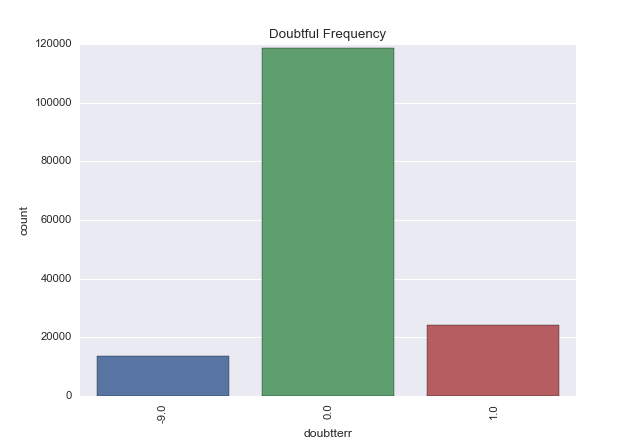

In [38]:
# Start with Column 22. Doubt Whether Terrorism. 0 - No doubt. 1 - There is doubt. -9 - No data.
# Histogram shows number of events with and without doubt.
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[22]]

unique_doubterr, doubt_counts = np.unique(curr_column, return_counts=True)
print(unique_doubterr)
print(doubt_counts)
    
#Check if any row is missing the region name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch. total_entries = " + str(total_entries) + " length spec count = " + str(len(doubt_counts)))
total = np.sum(doubt_counts)
if total_entries == total:
    print("Sum of Vicinity frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")
ax = sns.countplot(curr_column)
mp.pyplot.title("Doubtful Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

Doubtful case without classification. At index : 13261
Doubtful case without classification. At index : 16888
Doubtful case without classification. At index : 17381
Doubtful case without classification. At index : 18570
Doubtful case without classification. At index : 67766
Doubtful case without classification. At index : 68014
Doubtful case without classification. At index : 69650
Doubtful case without classification. At index : 84689
Doubtful case without classification. At index : 90234
Length matches.
Sum of Vicinity frequencies = Number of total entries
Number of missing classes: 132536
Number of events with classes: 24236


<IPython.core.display.Javascript object>


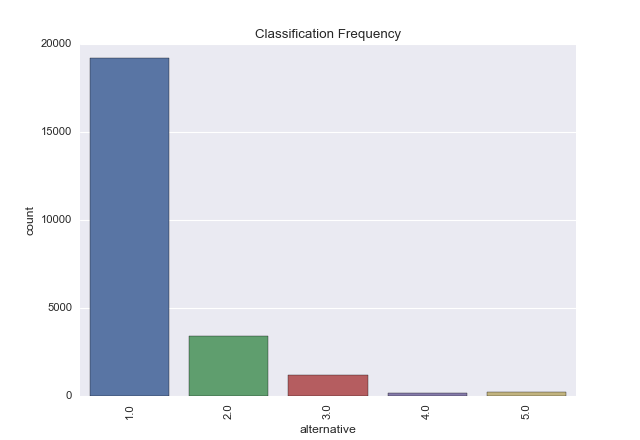

In [43]:
# Start with Column 23. Alternate classification if Doubterr is 1. Available only after 1997
# Histogram shows number of events with and without doubt.
#1= Insurgency/Guerilla Action
#2= Other Crime Type
#3= Inter/Intra‐Group Conflict
#4= Lack of Intentionality
#5= State Actors (systematically coded post‐2012)

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[23]]
sec_column = dfs[columns[22]]
unique_classifications, classification_counts = np.unique(curr_column, return_counts=True)
#print(unique_classifications)
#print(classification_counts)
nan_count = 0
for index, classification in enumerate(curr_column):
    if str(classification) == "nan":
        nan_count += 1
    else:
        if sec_column[index]!=1:
            print("Doubtful case without classification. At index : " + str(index))

#Check if any row is missing the region name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch. total_entries = " + str(total_entries) + " length spec count = " + str(len(classification_counts)))
total = np.sum(classification_counts)
if total_entries == total:
    print("Sum of Vicinity frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

print("Number of missing classes: " + str(nan_count))
print("Number of events with classes: " + str(total_entries - nan_count))
ax = sns.countplot(curr_column)
mp.pyplot.title("Classification Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)


Length matches.
Sum of Vicinity frequencies = Number of total entries
Number of missing data: 0


<IPython.core.display.Javascript object>


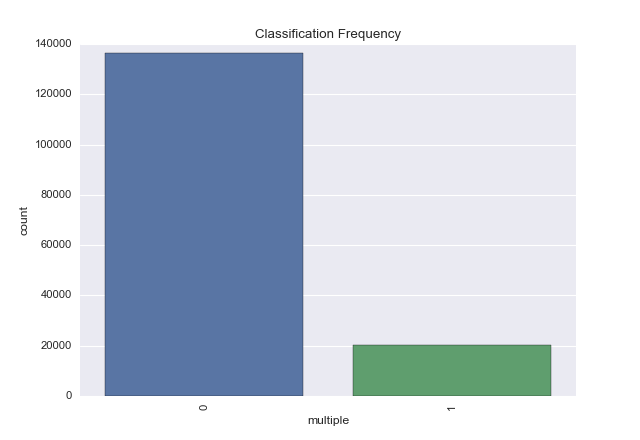

In [49]:
# Start with Column 25. Multiple events. Is the event part of multiple related events. Available systematically after 1997
# Histogram shows number of events connected to other events
# Column 136 holds the list of GTD IDs of related events as a comma separated string. Must be parsed.

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[25]]
sec_column = dfs[columns[136]]
is_part_of_multiple, multiple_counts = np.unique(curr_column, return_counts=True)
nan_count = 0
for index, ismultiple in enumerate(curr_column):
    if str(ismultiple) == "nan":
        nan_count += 1
    elif sec_column[index] == "nan":
        print("Part of multiple event but GIDs not provided at index = " + str(index))

#Check if any row is missing the region name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch. total_entries = " + str(total_entries) + " length spec count = " + str(len(multiple_counts)))
total = np.sum(multiple_counts)
if total_entries == total:
    print("Sum of Vicinity frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

print("Number of missing data: " + str(nan_count))
ax = sns.countplot(curr_column)
mp.pyplot.title("Classification Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)


Length matches.
Sum of Vicinity frequencies = Number of total entries
Number of missing data: 0


<IPython.core.display.Javascript object>


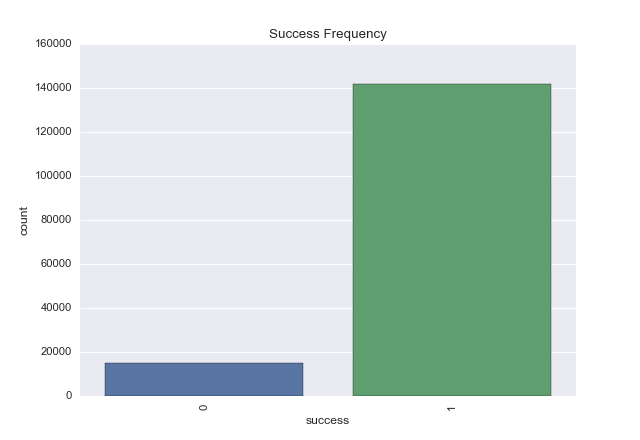

In [53]:
# Start with Column 26. Is the event considered a success. Criterion for success mentioned in codebook
# Histogram shows number of success/failed events

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[26]]
is_success, success_counts = np.unique(curr_column, return_counts=True)
nan_count = 0
for index, success in enumerate(curr_column):
    if str(success) == "nan":
        nan_count += 1
    
#Check if any row is missing the region name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch. total_entries = " + str(total_entries) + " length spec count = " + str(len(success_counts)))
total = np.sum(success_counts)
if total_entries == total:
    print("Sum of Vicinity frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

print("Number of missing data: " + str(nan_count))
ax = sns.countplot(curr_column)
mp.pyplot.title("Success Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)


Length matches.
Sum of Vicinity frequencies = Number of total entries
Number of missing data: 0


<IPython.core.display.Javascript object>


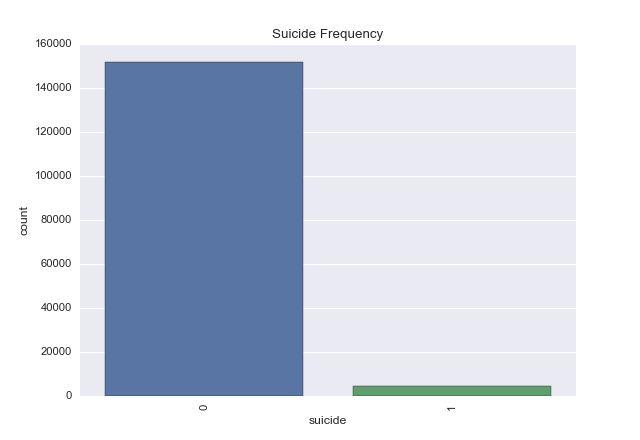

In [54]:
# Start with Column 26. Is the event a suicide attack.
# Histogram shows number of success/failed events

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[27]]
is_suicide, suicide_counts = np.unique(curr_column, return_counts=True)
nan_count = 0
for index, suicide in enumerate(curr_column):
    if str(suicide) == "nan":
        nan_count += 1
    
#Check if any row is missing the region name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch. total_entries = " + str(total_entries) + " length spec count = " + str(len(suicide_counts)))
total = np.sum(suicide_counts)
if total_entries == total:
    print("Sum of Vicinity frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

print("Number of missing data: " + str(nan_count))
ax = sns.countplot(curr_column)
mp.pyplot.title("Suicide Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)


[1 2 3 4 5 6 7 8 9]
[17582 37554 75963   556   835  9115  8849   828  5490]
['Armed Assault' 'Assassination' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Hijacking'
 'Hostage Taking (Barricade Incident)' 'Hostage Taking (Kidnapping)'
 'Unarmed Assault' 'Unknown']
[37554 17582 75963  8849   556   835  9115   828  5490]
Number of missing data in code: 0
Number of missing data in txt: 0
Length matches.
Sum of Vicinity frequencies = Number of total entries


<IPython.core.display.Javascript object>


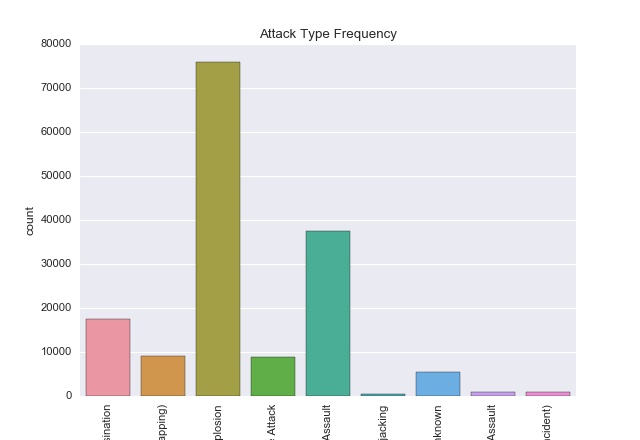

In [56]:
# Start with Column 28 and 29. Attack_type and attack_type_txt

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[28]]
sec_column = dfs[columns[29]]

unique_attacks, attack_counts = np.unique(curr_column, return_counts=True)
unique_attacks_txt, attack_counts_txt = np.unique(sec_column, return_counts=True)

print(unique_attacks)
print(attack_counts)
print(unique_attacks_txt)
print(attack_counts_txt)

nan_count = 0
for index, attacktype in enumerate(curr_column):
    if str(attacktype) == "nan":
        nan_count += 1
print("Number of missing data in code: " + str(nan_count))
nan_count = 0
for index, attacktypetxt in enumerate(sec_column):
    if str(attacktypetxt) == "nan":
        nan_count += 1
print("Number of missing data in txt: " + str(nan_count))

#Check if any row is missing the region name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch. total_entries = " + str(total_entries) + " length spec count = " + str(len(attack_counts_txt)))
total = np.sum(attack_counts_txt)
if total_entries == total:
    print("Sum of Vicinity frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(sec_column)
mp.pyplot.title("Attack Type Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)


In [61]:
# Start with Column 30 and 31. Attack_type_2 and attack_type_2_txt

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[30]]
sec_column = dfs[columns[31]]
print(columns[30])
print(columns[31])
attack2_dict = {}
attack2_txt_dict = {}

for index in range(0,total_entries):
    if str(curr_column[index]) == "nan" and str(sec_column[index]) != ".":
        print("Attack text present but attack code is nan. Index = " + str(index))
    elif str(sec_column[index]) == "." and str(curr_column[index]) != "nan":
        print("Attack code present but attack text is .. Index = " + str(index))
    if str(curr_column[index]) in attack2_dict:
        attack2_dict[str(curr_column[index])] += 1
    else: 
        attack2_dict[str(curr_column[index])] = 1
    if str(sec_column[index]) in attack2_txt_dict:
        attack2_txt_dict[str(sec_column[index])] += 1
    else: 
        attack2_txt_dict[str(sec_column[index])] = 1
         
print(attack2_dict)
print(attack2_txt_dict)

attacktype2
attacktype2_txt
{'7.0': 1083, '5.0': 34, '9.0': 3, '2.0': 2699, 'nan': 151806, '8.0': 36, '1.0': 161, '3.0': 448, '4.0': 12, '6.0': 490}
{'Unknown': 3, 'Hijacking': 12, 'Armed Assault': 2699, '.': 151806, 'Assassination': 161, 'Unarmed Assault': 36, 'Hostage Taking (Kidnapping)': 490, 'Hostage Taking (Barricade Incident)': 34, 'Facility/Infrastructure Attack': 1083, 'Bombing/Explosion': 448}


In [63]:
# Start with Column 32 and 33. Attack_type_3 and attack_type_3_txt

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[32]]
sec_column = dfs[columns[33]]
print(columns[30])
print(columns[31])
attack3_dict = {}
attack3_txt_dict = {}

for index in range(0,total_entries):
    if str(curr_column[index]) == "nan" and str(sec_column[index]) != ".":
        print("Attack text present but attack code is nan. Index = " + str(index))
    elif str(sec_column[index]) == "." and str(curr_column[index]) != "nan":
        print("Attack code present but attack text is .. Index = " + str(index))
    if str(curr_column[index]) in attack3_dict:
        attack3_dict[str(curr_column[index])] += 1
    else: 
        attack3_dict[str(curr_column[index])] = 1
    if str(sec_column[index]) in attack3_txt_dict:
        attack3_txt_dict[str(sec_column[index])] += 1
    else: 
        attack3_txt_dict[str(sec_column[index])] = 1
         
print(attack3_dict)
print(attack3_txt_dict)

attacktype2
attacktype2_txt
{'7.0': 122, '5.0': 2, '2.0': 102, 'nan': 156460, '8.0': 8, '1.0': 4, '3.0': 16, '4.0': 4, '6.0': 54}
{'Hijacking': 4, 'Armed Assault': 102, '.': 156460, 'Assassination': 4, 'Unarmed Assault': 8, 'Hostage Taking (Kidnapping)': 54, 'Hostage Taking (Barricade Incident)': 2, 'Bombing/Explosion': 16, 'Facility/Infrastructure Attack': 122}


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
[18882 19251 21241 22924   262  1303  3333  3947   294  2658   319   864
   464 35877  3891   936  2540   421  6419  3805  5504  1637]
['Abortion Related' 'Airports & Aircraft' 'Business'
 'Educational Institution' 'Food or Water Supply' 'Government (Diplomatic)'
 'Government (General)' 'Journalists & Media' 'Maritime' 'Military' 'NGO'
 'Other' 'Police' 'Private Citizens & Property'
 'Religious Figures/Institutions' 'Telecommunication'
 'Terrorists/Non-State Militia' 'Tourists' 'Transportation' 'Unknown'
 'Utilities' 'Violent Political Party']
[  262  1303 18882  3947   294  3333 19251  2658   319 22924   864   464
 21241 35877  3891   936  2540   421  6419  3805  5504  1637]
Number of missing data in code: 0
Number of missing data in txt: 0
Length matches.
Sum of Vicinity frequencies = Number of total entries


<IPython.core.display.Javascript object>


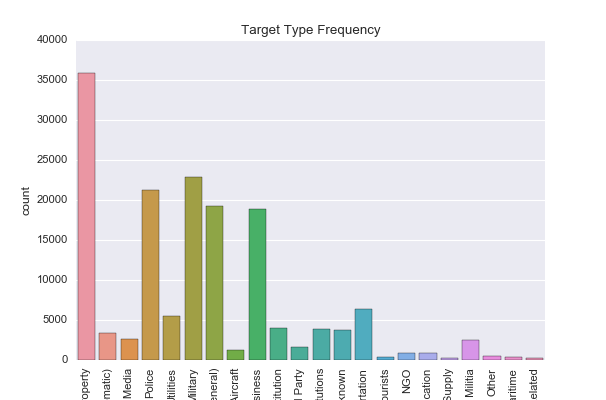

In [64]:
# Start with Column 34 and 35. Target_type and target_type_txt
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[34]]
sec_column = dfs[columns[35]]

unique_targs, targ_counts = np.unique(curr_column, return_counts=True)
unique_targs_txt, targ_counts_txt = np.unique(sec_column, return_counts=True)

print(unique_targs)
print(targ_counts)
print(unique_targs_txt)
print(targ_counts_txt)

nan_count = 0
for index, targtype in enumerate(curr_column):
    if str(targtype) == "nan":
        nan_count += 1
print("Number of missing data in code: " + str(nan_count))
nan_count = 0
for index, targtypetxt in enumerate(sec_column):
    if str(attacktypetxt) == "nan":
        nan_count += 1
print("Number of missing data in txt: " + str(nan_count))

#Check if any row is missing the region name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch. total_entries = " + str(total_entries) + " length spec count = " + str(len(targ_counts_txt)))
total = np.sum(targ_counts_txt)
if total_entries == total:
    print("Sum of Vicinity frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(sec_column)
mp.pyplot.title("Target Type Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)


In [77]:
# Start with Column 36 and 37. Target subtype and text.

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[36]]
sec_column = dfs[columns[37]]
print(columns[36])
print(columns[37])
targ_subtype_dict = {}
targ_subtype_txt_dict = {}

for index in range(0,total_entries):
    if str(curr_column[index]) == "nan" and str(sec_column[index]) != ".":
        print("Nationality text present but Nationality code is nan. Index = " + str(index))
    elif str(sec_column[index]) == "." and str(curr_column[index]) != "nan":
        print("Nationality code present but attack text is .. Index = " + str(index))
    if str(curr_column[index]) in targ_subtype_dict:
        targ_subtype_dict[str(curr_column[index])] += 1
    else: 
        targ_subtype_dict[str(curr_column[index])] = 1
    if str(sec_column[index]) in targ_subtype_txt_dict:
        targ_subtype_txt_dict[str(sec_column[index])] += 1
    else: 
        targ_subtype_txt_dict[str(sec_column[index])] = 1
         
print(targ_subtype_dict)
print(targ_subtype_txt_dict)
if sum(targ_subtype_dict.values())==total_entries:
       print("Num entries match")
if sum(targ_subtype_txt_dict.values())==total_entries:
       print("Num txt entries match")
print("Number of empty values: " + str(targ_subtype_txt_dict["."]))

targsubtype1
targsubtype1_txt
{'111.0': 101, '34.0': 6148, '80.0': 240, '17.0': 395, '95.0': 38, '90.0': 558, '77.0': 2406, '78.0': 451, '102.0': 138, '57.0': 92, '98.0': 60, '19.0': 847, '74.0': 2297, '29.0': 7496, '76.0': 2436, '49.0': 2740, '48.0': 729, '97.0': 238, '68.0': 2034, '65.0': 349, '110.0': 319, '21.0': 4509, '75.0': 4964, '107.0': 3868, '63.0': 42, '62.0': 519, '45.0': 922, '8.0': 980, '47.0': 817, '55.0': 385, '12.0': 876, '73.0': 2538, '23.0': 4375, '85.0': 1115, '81.0': 142, '67.0': 9585, '31.0': 159, '88.0': 117, '37.0': 942, '56.0': 92, '100.0': 2092, '30.0': 21, '27.0': 4054, '39.0': 564, 'nan': 8155, '35.0': 1675, '15.0': 5668, '94.0': 1580, '69.0': 2055, '106.0': 539, '93.0': 858, '5.0': 1261, '87.0': 312, '28.0': 237, '51.0': 72, '64.0': 19, '2.0': 1631, '20.0': 586, '99.0': 2663, '101.0': 510, '71.0': 1638, '7.0': 3675, '10.0': 358, '82.0': 747, '104.0': 233, '6.0': 617, '86.0': 2295, '89.0': 76, '66.0': 37, '61.0': 266, '33.0': 8, '26.0': 323, '42.0': 413, '10

In [74]:
# Start with Column 40 and 41. Nationality of victim and nationality text victim

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[40]]
sec_column = dfs[columns[41]]
print(columns[40])
print(columns[41])
nationality_dict = {}
nationality_txt_dict = {}

for index in range(0,total_entries):
    if str(curr_column[index]) == "nan" and str(sec_column[index]) != ".":
        print("Nationality text present but Nationality code is nan. Index = " + str(index))
    elif str(sec_column[index]) == "." and str(curr_column[index]) != "nan":
        print("Nationality code present but attack text is .. Index = " + str(index))
    if str(curr_column[index]) in nationality_dict:
        nationality_dict[str(curr_column[index])] += 1
    else: 
        nationality_dict[str(curr_column[index])] = 1
    if str(sec_column[index]) in nationality_txt_dict:
        nationality_txt_dict[str(sec_column[index])] += 1
    else: 
        nationality_txt_dict[str(sec_column[index])] = 1
         
#print(nationality_dict)
#print(nationality_txt_dict)
if sum(nationality_dict.values())==total_entries:
       print("Num entries match")
if sum(nationality_txt_dict.values())==total_entries:
       print("Num txt entries match")
print("Number of empty values: " + str(nationality_txt_dict["."]))

natlty1
natlty1_txt
Num entries match
Num txt entries match
Number of empty values: 1228
